In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import random
import cmath

np.random.seed(8)

# notes on comments: Q - Questions, A - Attention (to do, to pay attention to)

In [2]:
# (complex) phase
def convert_phase(T, t):
    return math.pi * t / (T * 2) 

def convert_exp(array): 
    res = np.zeros(len(array), dtype=np.complex_)
    for a in range(len(array)):
        res[a] = cmath.exp(array[a])
    return res

def abs_average_w(phi, r):
    if phi == 0:
        return 1 #no area to integrate over when phi = 0 (jitter = zero, but average 1!!)
    else:
        return 1 / phi * r * abs((cmath.exp(complex(0, 1) * phi) - 1) / complex(0, 1))

/home/laura/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


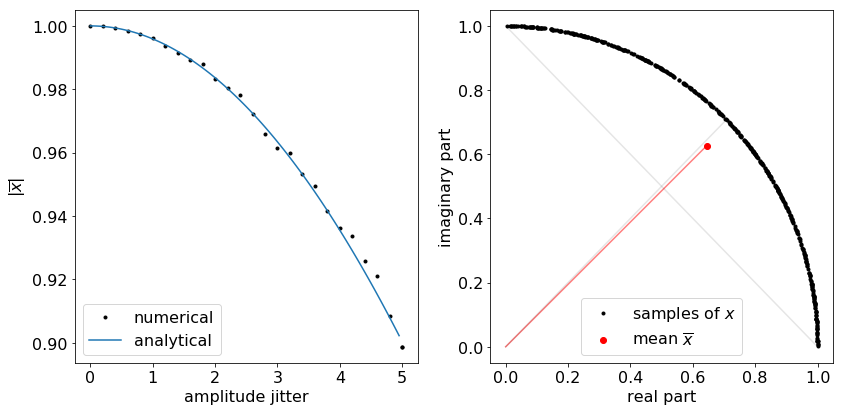

In [3]:
# DEPENDENCY OF ABS(WEIGHT SPIKE) ON UNIFORM DISTRIBUTED JITTER FOR A SINGLE NEURON
# Q: irregularities due to insufficient number of samples 
# A: negative real parts/imag parts

plt.figure(figsize = (12, 6))
plt.rcParams.update({'font.size': 16}) #change font size for figures

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

T = 10

for b in range(26):
    delay = np.zeros(500)
    upper = 0.2 * b
    for a in range(500):
        delay[a] = 5 + np.random.uniform(-upper,upper,1)
    complex_numbers = convert_exp(complex(0, 1) * convert_phase(T, delay))
    plt.subplot(1, 2, 2)
    if b == 25:
        # plot samples for variance = 5 and its mean
        plt.plot(complex_numbers.real, complex_numbers.imag, '.k', label = r'samples of $x$')
        mean_complex = np.mean(complex_numbers)
        plt.plot([0, mean_complex.real], [0, mean_complex.imag], color = 'r', alpha = 0.5)
        plt.plot(mean_complex.real, mean_complex.imag, 'or', label = r'mean $\overline{x}$')
        plt.plot([0, 1], [1, 0], color = 'k', alpha = 0.1)
        plt.legend()
    mean_complex = np.mean(complex_numbers)
    plt.subplot(1, 2, 1)
    plt.plot(upper,abs(mean_complex), '.k')
    if b == 25:
        plt.plot(upper,abs(mean_complex), '.k', label = 'numerical')
        plt.xlabel('amplitude jitter')
        plt.ylabel(r'$|\overline{x}|$')
    
plt.subplot(1, 2, 2)
plt.plot([0, math.sqrt(2)/2], [0, math.sqrt(2)/2], 'k', alpha = 0.1)
plt.xlabel('real part')
plt.ylabel('imaginary part')

# analytical result
result = []
for c in range(100):
    result.append(abs_average_w(c * math.pi / 200, 1)) # pi / 2 / 100

plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 5, 0.05), result, label = 'analytical') 
plt.legend(loc = 3)

plt.tight_layout()
#plt.savefig('jitter_.pdf')
plt.show()

Left hand plot: $|\overline{x}|$ (absolute value (modulus) of average of $x$), $x$ refers thereby to the complex number describing a single spike happening at time $t_s = T / 2 = 5$ and depending on jitter. The jitter is added on top of the spike times $t_s$ and created from a uniform distribution. The upper and lower bound of the jitter increase up to $t_j = 5$. The modulus of the average weight decreases when the jitter increases.

Right hand plot: values of the complex spike times for highest range of jitter (between $t_j = -5/5$), to check that all possible values are occuring.

Plots confirm analytical results: 

$$
|\overline{x}| = |\frac{1}{\phi} * r\int_{\phi} exp(\phi i) d\phi|\\
= |\frac{1}{1 / 2 \pi} * r \int_{0}^{1/2 \pi} exp(\phi i) d\phi|\\
= \frac{2}{\pi} * r |1 + i|\\
= \frac{2 \sqrt2}{\pi} * r = 0.9 * r
$$

With $r = 1$ (corresponding to weight of spike), we get $|\overline{x}| = 0.9$. Thism approx. corresponds to what we see in the left hand plot, lower righ corner.